# What is divergence?

measure of the difference between two probability distributions P(x) and Q(X). It quantifies how one distribution diverges from another!

# Commonly used divergence types: 

Kullback-Leibler , Jensen-Shannon , Wasserstein Distance (Earth Mover's Distance), Bhattacharyya Distance, Hellinger Distance

# Kullback-Leibler Divergence: 

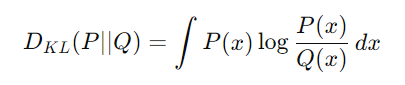


1) KL divergence measures how one probablity distribution diverges from a reference distribution. 

2) KL divergence is asymmetric, means DivergenceKL(P(x)||Q(x)) != DivegenceKL(Q(x)||P(x)).

3) P(x) is real or reference distribution, Q(x) is approximation or model distribution.

4) DivergenceKL(P||Q) emphasize regions where P(x) is large, it measures how well Q(x) approximates P(X) emphasizing mismatches in regions where P(x) has high probability.while, 

5) DivergenceKL(Q||P) emphasize regions where Q(x) is large, it measures how well P(x) approximates Q(X) emphasizing mismatches in regions where Q(x) has high probability.

6) DivergenceKL(P||Q) penalizes Q(x) highly for underestimating probabilities assigned by P(x). 

7) DivergenceKL(Q||P) penalizes P(x) for failing to cover regions where Q(x) assigns high probability.

8) Useful, when we want to understand how one of the distributions deviate from the other one. 














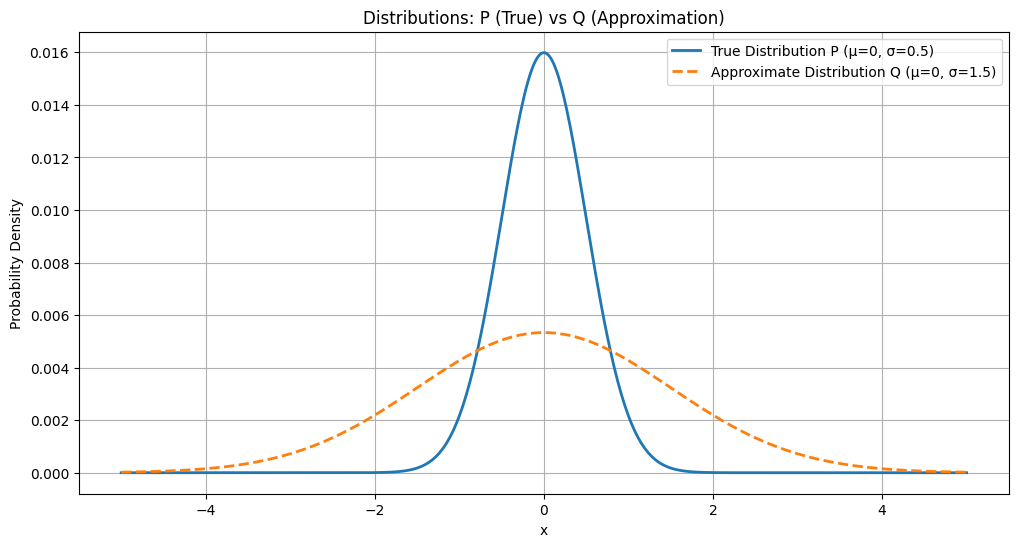

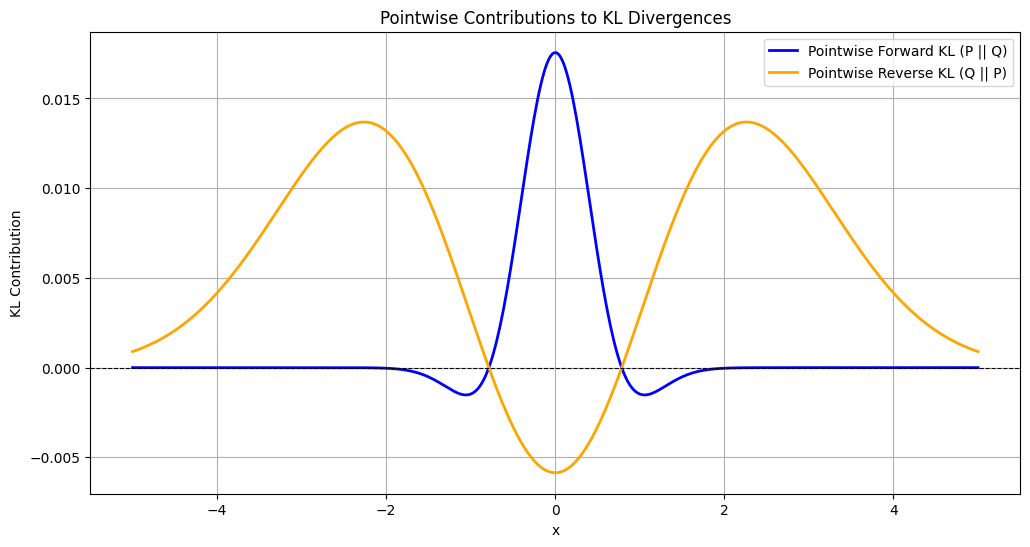

Forward KL Divergence D_KL(P || Q): 0.0131
Reverse KL Divergence D_KL(Q || P): 0.0574


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Define the parameters for the two distributions
mu_P, sigma_P = 0, 0.5  # P(x): True data distribution (sharp peak)
mu_Q, sigma_Q = 0, 1.5  # Q(x): Approximate/model distribution (broader)

# Create a range of x values
x = np.linspace(-5, 5, 500)

# Calculate the probability densities
P = np.exp(-0.5 * ((x - mu_P) / sigma_P) ** 2) / (sigma_P * np.sqrt(2 * np.pi))
Q = np.exp(-0.5 * ((x - mu_Q) / sigma_Q) ** 2) / (sigma_Q * np.sqrt(2 * np.pi))

# Normalize P and Q to ensure they sum to 1 (discrete approximation for KL calculation)
P /= np.sum(P)
Q /= np.sum(Q)

# Compute Forward KL Divergence (D_KL(P || Q))
forward_KL = np.sum(P * np.log(P / Q) * (x[1] - x[0]))

# Compute Reverse KL Divergence (D_KL(Q || P))
reverse_KL = np.sum(Q * np.log(Q / P) * (x[1] - x[0]))

# Plot the distributions P and Q
plt.figure(figsize=(12, 6))
plt.plot(x, P, label=f"True Distribution P (μ={mu_P}, σ={sigma_P})", linewidth=2)
plt.plot(x, Q, label=f"Approximate Distribution Q (μ={mu_Q}, σ={sigma_Q})", linestyle='--', linewidth=2)
plt.title("Distributions: P (True) vs Q (Approximation)")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()
plt.show()

# Plot the pointwise contributions to Forward and Reverse KL Divergences
KL_pointwise_forward = P * np.log(P / Q)  # Pointwise contribution to D_KL(P || Q)
KL_pointwise_reverse = Q * np.log(Q / P)  # Pointwise contribution to D_KL(Q || P)

plt.figure(figsize=(12, 6))
plt.plot(x, KL_pointwise_forward, label="Pointwise Forward KL (P || Q)", color="blue", linewidth=2)
plt.plot(x, KL_pointwise_reverse, label="Pointwise Reverse KL (Q || P)", color="orange", linewidth=2)
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.title("Pointwise Contributions to KL Divergences")
plt.xlabel("x")
plt.ylabel("KL Contribution")
plt.legend()
plt.grid()
plt.show()

# Print the computed KL Divergences
print(f"Forward KL Divergence D_KL(P || Q): {forward_KL:.4f}")
print(f"Reverse KL Divergence D_KL(Q || P): {reverse_KL:.4f}")


# KL Divergence Behavior :

P(x) : True distribution with a sharp peak(mu : 0 , sigma: 0.5)

Q(x) : Approximation, smoother and broader (mu : 0 , sigma: 1.5)

Q(x) is covering a broader range, but doesn't sharply capture the peak of P(x).

KL Divergence results: 

Forward KL divergence DivKL(P||Q) : 0.0131 - Measures how poorly Q represent the sharp peak of P, Small value because Q covers the high-probability region of P, though it doesn't match the peak well. Forward DivKL Penalizes Q for underestimating probabilities where P(x) has high values (mode-seeking). Highlights the mismatch where P(x) has high values, and Q(x) underestimates those regions.

Reverse KL divergence DivKL(Q||P) : 0.0574 - Measures how poorly P covers the broader support of Q, Larger value because P(x)'s narrow peak assigns near-zero probabilities in regions where Q(x) has significant probabilities. Reverse DivKL Penalizes P for failing to cover Q's support (mode-covering). Shows the mismatch where Q(x) assigns probabilities to regions that P(x) barely covers.

Conclusion: 

Forward DivKL(P∣∣Q): Focuses on whether Q(x) captures P(x)'s peak accurately. Small penalty for broader support, but underestimation near the peak is penalized.

Reverse DivKL(Q||P): Focuses on whether P(x) covers Q(x)'s support adequately. Strong penalty for zero probabilities in regions where Q(x) has mass.

This behavior aligns with the mode-seeking (Forward KL) and mode-covering (Reverse KL) tendencies, depending on which distribution is treated as the reference.


# Jensen-Shannon Divergence:


JS divergence is symmetric and bounded version of KL divergence and it gives a value between 0 and 1 where the base of the logarithm is 2.
root(JS) is a metric that holds in the triangle inequality and is used in Generative Adversarial Networks (GANs).


img

M = 1/2 (P + Q)

# Jensen-Shannon Divergence: 

1) Symmetric and bounded.

2) Measures the similarity between two distributions.

3) Often preferred to compare clusters due to robustness.

**why JS divergence is more robust in comparison to other divergences like KL??** 

--> JS divergence treats both distributions equally, and is symmetric. This makes JS divergence fair when analyzing clusters, as there’s no need to define one distribution as the "true" or "reference" distribution.

--> JS divergence is bounded between 0 and 1. Unlike KL divergence, which can become infinite if one distribution assigns a zero probability to a region where the other has non-zero probability, JS divergence avoids this problem. This bounded nature makes JS divergence stable and interpretable, especially when dealing with sparse or disjoint data clusters.

--> JS divergence uses the mixture distribution M(x)=1/2(P(x)+Q(x)) as an intermediate representation. The mixture M(x) acts as a common ground, preventing extreme penalization of mismatched regions (e.g., where P(x)=0 or Q(x)=0). By smoothing over the differences, JS divergence remains finite and less sensitive to outliers or sharp discrepancies between distributions.

--> The bounded nature of JS divergence and its basis on probabilities make it easier to interpret: A JS divergence of 0 indicates that the distributions are identical. A value closer to 1 indicates greater divergence. Clear interpretability allows for straightforward comparisons between clusters, even in high-dimensional spaces or when distributions have different shapes or scales.

--> JS divergence can handle disjoint distributions (where P(x) and Q(x) have non-overlapping support). In cases where 
P(x)=0 in regions where Q(x)>0, or vice versa, KL divergence becomes undefined or infinite. JS divergence remains well-defined due to the smoothing effect of the mixture M(x).


--> JS divergence penalizes moderate mismatches more uniformly compared to KL divergence, which disproportionately penalizes extreme mismatches (like near-zero probabilities). This balanced penalization is particularly useful in clustering, where moderate differences between cluster distributions are more common and relevant than extreme outliers.

--> In the context of clustering, JS divergence is robust because:

* It quantifies separability: A high JS divergence between two cluster distributions indicates well-separated clusters, while a low value suggests overlap.
* It handles sparse or high-dimensional data: By avoiding extreme penalties for zero probabilities, JS divergence is more suitable for real-world, noisy datasets with sparse or irregular distributions.
* It generalizes well: The symmetric and bounded properties ensure that comparisons remain consistent, even for complex clustering problems.

--> Conclusion: JS divergence is robust because of its symmetry, boundedness, stability for disjoint distributions, and balanced penalization of mismatches. These properties make it an excellent choice for comparing clusters, validating clustering results, and analyzing separability in both theoretical and practical applications.

# Example of JS divergence robustness: 

Ex1 : 

In this example, P is a sharply peaked distribution of cluster 1, (Mu: 0 , sigma: 0.5). Q is broader and shifted distribution of cluster 2 (Mu: 1 , sigma: 1). The shaded grey area is differences between P and Q. Forward KL penalize regions where Q underestimate P's peak. Reverse KL penalize regions where P fails to cover Q's broader support. Forward KL : 0.0096 indicates Q mostly captures peak of P but with some penalty for underestimating it. Reverse KL : 0.0294 indicates P fails to cover parts of Q support. JS divergence : 0.3147 provides symmetric and bounded measure of divergence, capturing the average seperation of P and Q. 

 JS divergence captures an interpretable and symmetric measure of separability, combining insights from both KL directions while remaining robust to discrepancies between P and Q.

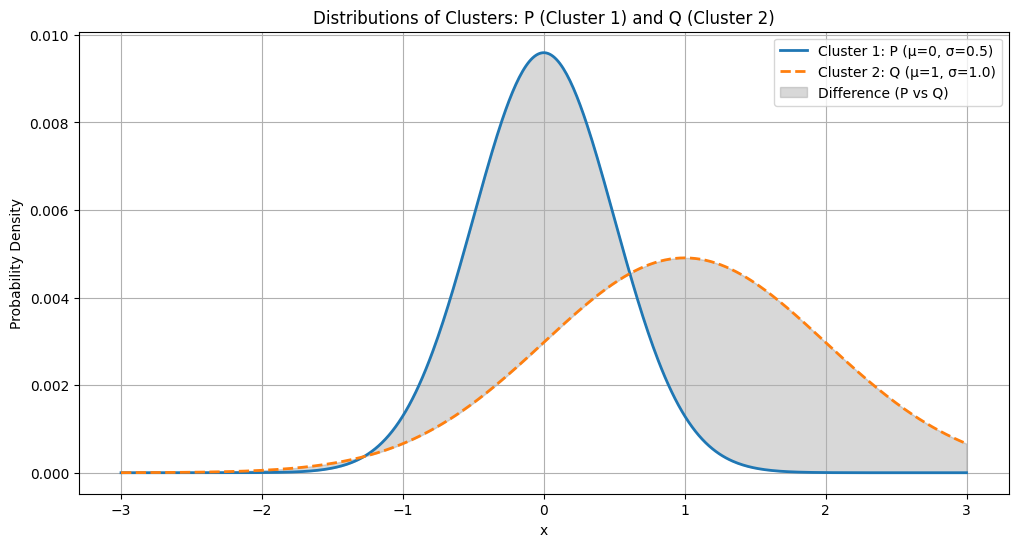

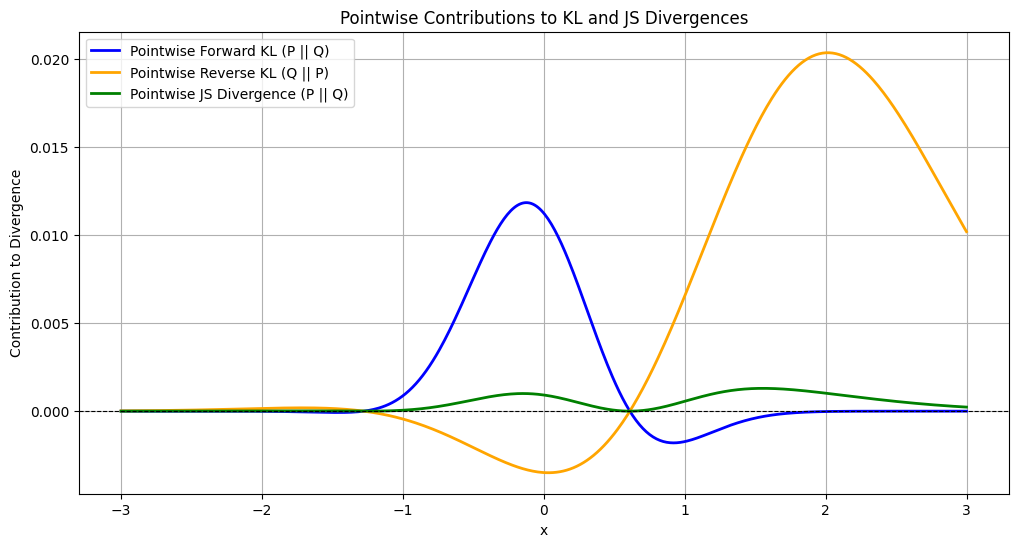

Forward KL Divergence D_KL(P || Q): 0.0096
Reverse KL Divergence D_KL(Q || P): 0.0294
Jensen-Shannon Divergence JS(P || Q): 0.3147


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Define the parameters for the two distributions
mu_P, sigma_P = 0, 0.5  # P(x): Cluster 1 (sharp peak)
mu_Q, sigma_Q = 1, 1.0  # Q(x): Cluster 2 (broader and shifted)

# Create a range of x values
x = np.linspace(-3, 3, 500)

# Calculate the probability densities
P = np.exp(-0.5 * ((x - mu_P) / sigma_P) ** 2) / (sigma_P * np.sqrt(2 * np.pi))
Q = np.exp(-0.5 * ((x - mu_Q) / sigma_Q) ** 2) / (sigma_Q * np.sqrt(2 * np.pi))

# Normalize P and Q to ensure they sum to 1 (discrete approximation for KL and JS calculations)
P /= np.sum(P)
Q /= np.sum(Q)

# Compute Forward KL Divergence (D_KL(P || Q))
forward_KL = np.sum(P * np.log(P / Q) * (x[1] - x[0]))

# Compute Reverse KL Divergence (D_KL(Q || P))
reverse_KL = np.sum(Q * np.log(Q / P) * (x[1] - x[0]))

# Compute Jensen-Shannon Divergence
M = 0.5 * (P + Q)  # Mixture distribution
JS_divergence = 0.5 * (entropy(P, M, base=2) + entropy(Q, M, base=2))

# Calculate pointwise contributions for Forward KL, Reverse KL, and Jensen-Shannon Divergence
KL_pointwise_forward = P * np.log(P / Q)  # Pointwise contribution to D_KL(P || Q)
KL_pointwise_reverse = Q * np.log(Q / P)  # Pointwise contribution to D_KL(Q || P)
JS_pointwise = 0.5 * (P * np.log(P / M) + Q * np.log(Q / M))  # Pointwise JS contribution

# Plot the distributions
plt.figure(figsize=(12, 6))
plt.plot(x, P, label=f"Cluster 1: P (μ={mu_P}, σ={sigma_P})", linewidth=2)
plt.plot(x, Q, label=f"Cluster 2: Q (μ={mu_Q}, σ={sigma_Q})", linestyle='--', linewidth=2)
plt.fill_between(x, P, Q, color='gray', alpha=0.3, label="Difference (P vs Q)")
plt.title("Distributions of Clusters: P (Cluster 1) and Q (Cluster 2)")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()
plt.show()

# Plot the pointwise contributions
plt.figure(figsize=(12, 6))
plt.plot(x, KL_pointwise_forward, label="Pointwise Forward KL (P || Q)", color="blue", linewidth=2)
plt.plot(x, KL_pointwise_reverse, label="Pointwise Reverse KL (Q || P)", color="orange", linewidth=2)
plt.plot(x, JS_pointwise, label="Pointwise JS Divergence (P || Q)", color="green", linewidth=2)
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.title("Pointwise Contributions to KL and JS Divergences")
plt.xlabel("x")
plt.ylabel("Contribution to Divergence")
plt.legend()
plt.grid()
plt.show()

# Print the results
print(f"Forward KL Divergence D_KL(P || Q): {forward_KL:.4f}")
print(f"Reverse KL Divergence D_KL(Q || P): {reverse_KL:.4f}")
print(f"Jensen-Shannon Divergence JS(P || Q): {JS_divergence:.4f}")


Ex2:

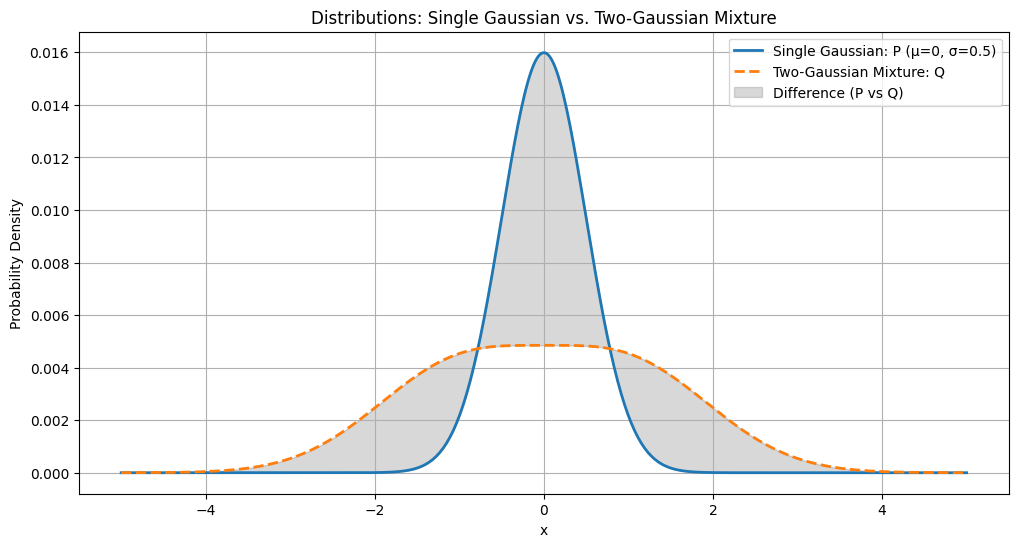

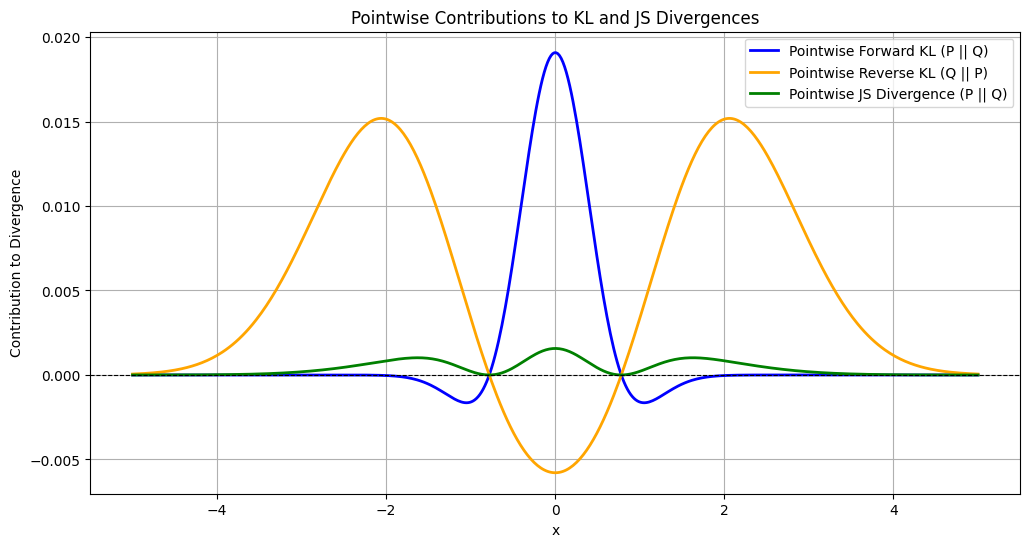

Forward KL Divergence D_KL(P || Q): 0.0141
Reverse KL Divergence D_KL(Q || P): 0.0495
Jensen-Shannon Divergence JS(P || Q): 0.2850


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy

# Define two distributions: Gaussian vs. Two-Gaussian Mixture
mu_P, sigma_P = 0, 0.5  # P(x): Single Gaussian distribution (sharp peak)
mu_Q1, sigma_Q1 = -1, 1.0  # Q1(x): First component of the Two-Gaussian mixture
mu_Q2, sigma_Q2 = 1, 1.0  # Q2(x): Second component of the Two-Gaussian mixture

# Create a range of x values
x = np.linspace(-5, 5, 500)

# Calculate the probability densities
P = np.exp(-0.5 * ((x - mu_P) / sigma_P) ** 2) / (sigma_P * np.sqrt(2 * np.pi))  # Single Gaussian
Q1 = np.exp(-0.5 * ((x - mu_Q1) / sigma_Q1) ** 2) / (sigma_Q1 * np.sqrt(2 * np.pi))  # First Gaussian in mixture
Q2 = np.exp(-0.5 * ((x - mu_Q2) / sigma_Q2) ** 2) / (sigma_Q2 * np.sqrt(2 * np.pi))  # Second Gaussian in mixture
Q = 0.5 * (Q1 + Q2)  # Two-Gaussian Mixture

# Normalize P and Q to ensure they sum to 1 (discrete approximation for KL and JS calculations)
P /= np.sum(P)
Q /= np.sum(Q)

# Compute Forward KL Divergence (D_KL(P || Q))
forward_KL = np.sum(P * np.log(P / Q) * (x[1] - x[0]))

# Compute Reverse KL Divergence (D_KL(Q || P))
reverse_KL = np.sum(Q * np.log(Q / P) * (x[1] - x[0]))

# Compute Jensen-Shannon Divergence
M = 0.5 * (P + Q)  # Mixture distribution
JS_divergence = 0.5 * (entropy(P, M, base=2) + entropy(Q, M, base=2))

# Calculate pointwise contributions for Forward KL, Reverse KL, and Jensen-Shannon Divergence
KL_pointwise_forward = P * np.log(P / Q)  # Pointwise contribution to D_KL(P || Q)
KL_pointwise_reverse = Q * np.log(Q / P)  # Pointwise contribution to D_KL(Q || P)
JS_pointwise = 0.5 * (P * np.log(P / M) + Q * np.log(Q / M))  # Pointwise JS contribution

# Plot the distributions
plt.figure(figsize=(12, 6))
plt.plot(x, P, label=f"Single Gaussian: P (μ={mu_P}, σ={sigma_P})", linewidth=2)
plt.plot(x, Q, label="Two-Gaussian Mixture: Q", linestyle='--', linewidth=2)
plt.fill_between(x, P, Q, color='gray', alpha=0.3, label="Difference (P vs Q)")
plt.title("Distributions: Single Gaussian vs. Two-Gaussian Mixture")
plt.xlabel("x")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()
plt.show()

# Plot the pointwise contributions
plt.figure(figsize=(12, 6))
plt.plot(x, KL_pointwise_forward, label="Pointwise Forward KL (P || Q)", color="blue", linewidth=2)
plt.plot(x, KL_pointwise_reverse, label="Pointwise Reverse KL (Q || P)", color="orange", linewidth=2)
plt.plot(x, JS_pointwise, label="Pointwise JS Divergence (P || Q)", color="green", linewidth=2)
plt.axhline(0, color="black", linestyle="--", linewidth=0.8)
plt.title("Pointwise Contributions to KL and JS Divergences")
plt.xlabel("x")
plt.ylabel("Contribution to Divergence")
plt.legend()
plt.grid()
plt.show()

# Print the results
print(f"Forward KL Divergence D_KL(P || Q): {forward_KL:.4f}")
print(f"Reverse KL Divergence D_KL(Q || P): {reverse_KL:.4f}")
print(f"Jensen-Shannon Divergence JS(P || Q): {JS_divergence:.4f}")


# KL, JS, Jeffreys divergence - Special Cases:

Sparse data:

P(x): Truncated exponential. 

Q(x): Uniform.

Challenge:  KL divergences encounter numerical problems due to zero probabilities.

Result: Only Jensen-Shannon divergence remains robust!

********

High-Dimensional: 

P(x), Q(x): Multi-modal Gaussians.

In this case distributions are well-separated, leading to significant divergence values'

********

Noisy data: 

P(x): Smooth G.aussian. 

Q(x): Noisy version of P(x).

Challenge: KL divergences face infinity or undefined behavior due to mismatched noise.

********

Sensitivity to noise:

KL divergence: Very sensitive; amplifies small deviations. 

JS divergence: Stable and bounded, reducing noise influence.

Jeffreys divergence: Symmetric but prone to exaggeration due to reliance on KL.

********

JS Divergence:

JS divergence is more robust to noise:

* It smooths the differences between P(x) and Q(x) by incorporating the mixture distribution 
M(x)=0.5(P+Q).

* Noise effects are averaged out, leading to finite and stable values even in noisy regions.

* Bounded between 0 and 1 (when using base-2 logarithms), making it insensitive to extreme perturbations.

*******

KL Divergence: 

Forward KL (DKL(P∣∣Q)):

* Focuses on regions where P(x) has high probabilities.

* Penalizes Q(x) heavily if it assigns low or zero probabilities to those regions, amplifying the effects of noise.

* Highly sensitive to small deviations in regions where P(x) is large.

Reverse KL (DKL(Q∣∣P)):

* Focuses on regions where Q(x) has high probabilities.

* Penalizes P(x) if it assigns zero probabilities where Q(x) has significant mass.

* Sensitive to noise in regions with high Q(x).

Conclusion:

* Both forward and reverse KL divergences amplify noise effects.

* Can lead to infinite or undefined values if noise creates zero probabilities in either distribution.

*********

Jeffreys Divergence:

* Combines forward and reverse KL divergences:

J(P∣∣Q)=DKL(P∣∣Q)+DKL(Q∣∣P)


* Captures noise effects symmetrically:

* Penalizes both Q(x) failing to approximate P(x) and P(x) failing to match noisy Q(x).
* As it inherits KL divergence’s sensitivity, it can overemphasize noise in high-probability regions.

Conclusion:

While symmetric, Jeffreys divergence may exaggerate noise effects when distributions have sharp mismatches.




C:\Users\labab\AppData\Local\Temp\ipykernel_10084\320352519.py:11: RuntimeWarning: divide by zero encountered in log
  forward_KL = np.sum(P * np.log(P / Q) * (x[1] - x[0]))
C:\Users\labab\AppData\Local\Temp\ipykernel_10084\320352519.py:11: RuntimeWarning: invalid value encountered in multiply
  forward_KL = np.sum(P * np.log(P / Q) * (x[1] - x[0]))
C:\Users\labab\AppData\Local\Temp\ipykernel_10084\320352519.py:12: RuntimeWarning: divide by zero encountered in divide
  reverse_KL = np.sum(Q * np.log(Q / P) * (x[1] - x[0]))
C:\Users\labab\AppData\Local\Temp\ipykernel_10084\320352519.py:11: RuntimeWarning: divide by zero encountered in divide
  forward_KL = np.sum(P * np.log(P / Q) * (x[1] - x[0]))
C:\Users\labab\AppData\Local\Temp\ipykernel_10084\320352519.py:12: RuntimeWarning: divide by zero encountered in log
  reverse_KL = np.sum(Q * np.log(Q / P) * (x[1] - x[0]))
C:\Users\labab\AppData\Local\Temp\ipykernel_10084\320352519.py:12: RuntimeWarning: invalid value encountered in multiply

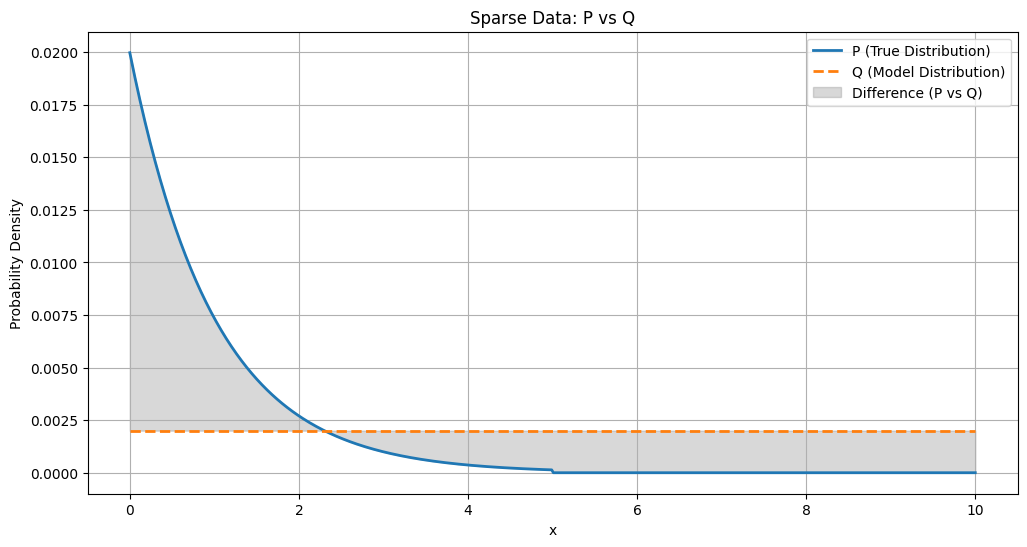

--- Sparse Data ---
Forward KL Divergence (P || Q): nan
Reverse KL Divergence (Q || P): inf
Jensen-Shannon Divergence (P || Q): 0.4773
Jeffreys Divergence (P || Q): nan




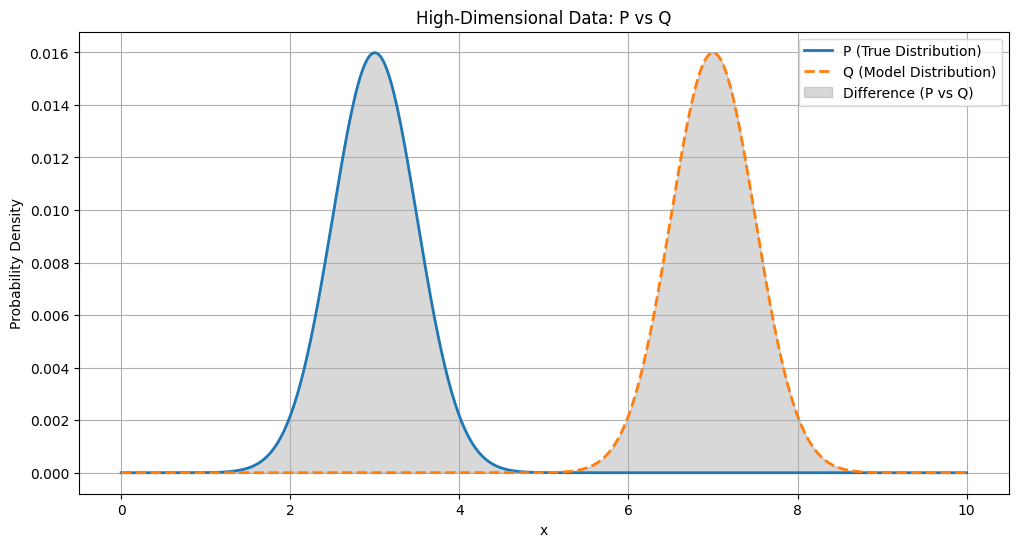

--- High-Dimensional Data ---
Forward KL Divergence (P || Q): 0.6413
Reverse KL Divergence (Q || P): 0.6413
Jensen-Shannon Divergence (P || Q): 0.9999
Jeffreys Divergence (P || Q): 1.2826




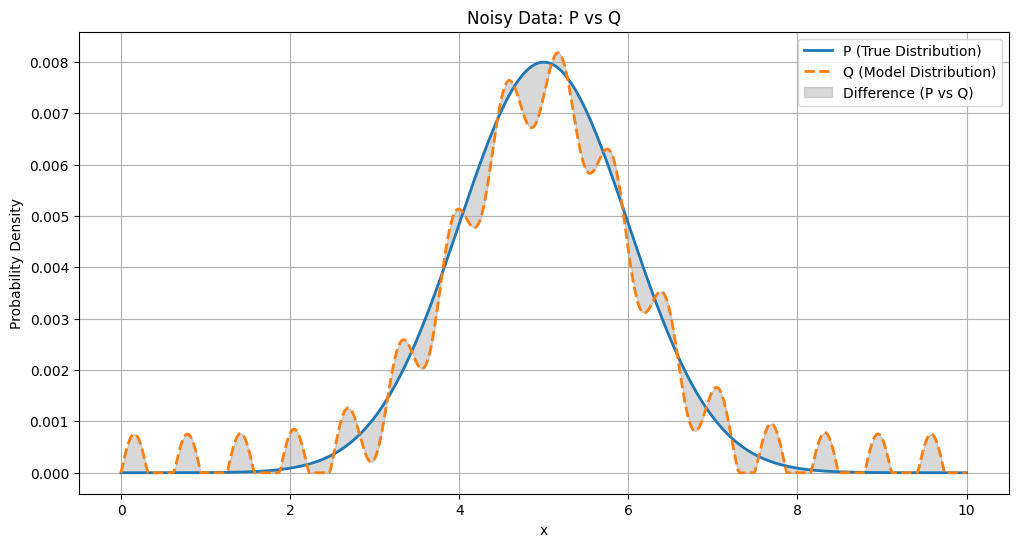

--- Noisy Data ---
Forward KL Divergence (P || Q): inf
Reverse KL Divergence (Q || P): nan
Jensen-Shannon Divergence (P || Q): 0.0363
Jeffreys Divergence (P || Q): nan


Data for Sparse Data saved as CSV.
Data for High-Dimensional Data saved as CSV.
Data for Noisy Data saved as CSV.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import entropy
import pandas as pd

# Function to compute divergences
def compute_divergences(P, Q, x):
    """
    Compute forward KL, reverse KL, JS, and Jeffreys divergence between P and Q.
    """
    forward_KL = np.sum(P * np.log(P / Q) * (x[1] - x[0]))
    reverse_KL = np.sum(Q * np.log(Q / P) * (x[1] - x[0]))
    JS_divergence = 0.5 * (entropy(P, 0.5 * (P + Q), base=2) + entropy(Q, 0.5 * (P + Q), base=2))
    jeffreys_divergence = forward_KL + reverse_KL
    return forward_KL, reverse_KL, JS_divergence, jeffreys_divergence

# Case 1: Sparse Data
x_sparse = np.linspace(0, 10, 500)
P_sparse = np.exp(-x_sparse)  # Exponential-like sparse distribution
P_sparse[x_sparse > 5] = 0  # Sparse by truncating
Q_sparse = np.ones_like(P_sparse)  # Uniform distribution for comparison
P_sparse /= np.sum(P_sparse)  # Normalize
Q_sparse /= np.sum(Q_sparse)

# Case 2: High-Dimensional Data (simplified to multi-modal in 1D)
x_highdim = np.linspace(0, 10, 500)
P_highdim = np.exp(-0.5 * ((x_highdim - 3) / 0.5) ** 2)  # Peak around 3
Q_highdim = np.exp(-0.5 * ((x_highdim - 7) / 0.5) ** 2)  # Peak around 7
P_highdim /= np.sum(P_highdim)  # Normalize
Q_highdim /= np.sum(Q_highdim)

# Case 3: Noisy Data
x_noisy = np.linspace(0, 10, 500)
P_noisy = np.exp(-0.5 * ((x_noisy - 5) / 1) ** 2)  # Gaussian distribution
Q_noisy = P_noisy + 0.1 * np.sin(10 * x_noisy)  # Add noise to Q
Q_noisy[Q_noisy < 0] = 0  # Remove negative probabilities
P_noisy /= np.sum(P_noisy)  # Normalize
Q_noisy /= np.sum(Q_noisy)

# Compute divergences
div_sparse = compute_divergences(P_sparse, Q_sparse, x_sparse)
div_highdim = compute_divergences(P_highdim, Q_highdim, x_highdim)
div_noisy = compute_divergences(P_noisy, Q_noisy, x_noisy)

# Visualization and storing data
cases = [("Sparse Data", x_sparse, P_sparse, Q_sparse, div_sparse),
         ("High-Dimensional Data", x_highdim, P_highdim, Q_highdim, div_highdim),
         ("Noisy Data", x_noisy, P_noisy, Q_noisy, div_noisy)]

for name, x, P, Q, divergences in cases:
    plt.figure(figsize=(12, 6))
    plt.plot(x, P, label="P (True Distribution)", linewidth=2)
    plt.plot(x, Q, label="Q (Model Distribution)", linestyle='--', linewidth=2)
    plt.fill_between(x, P, Q, color='gray', alpha=0.3, label="Difference (P vs Q)")
    plt.title(f"{name}: P vs Q")
    plt.xlabel("x")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid()
    plt.show()
    
    # Print divergences
    forward_KL, reverse_KL, JS, Jeffreys = divergences
    print(f"--- {name} ---")
    print(f"Forward KL Divergence (P || Q): {forward_KL:.4f}")
    print(f"Reverse KL Divergence (Q || P): {reverse_KL:.4f}")
    print(f"Jensen-Shannon Divergence (P || Q): {JS:.4f}")
    print(f"Jeffreys Divergence (P || Q): {Jeffreys:.4f}")
    print("\n")

# Store data for each case
data_sparse = {"x": x_sparse, "P": P_sparse, "Q": Q_sparse}
data_highdim = {"x": x_highdim, "P": P_highdim, "Q": Q_highdim}
data_noisy = {"x": x_noisy, "P": P_noisy, "Q": Q_noisy}

# Combine all data into a dictionary for export if needed
all_data = {
    "Sparse Data": data_sparse,
    "High-Dimensional Data": data_highdim,
    "Noisy Data": data_noisy,
}

# Save the data as CSV files for each case
for case_name, data in all_data.items():
    df = pd.DataFrame({"x": data["x"], "P": data["P"], "Q": data["Q"]})
    df.to_csv(f"{case_name.replace(' ', '_').lower()}_data.csv", index=False)
    print(f"Data for {case_name} saved as CSV.")
